# Titanic Survival Analysis  
**Author:** Saratchandra Golla  
**Date:** November 2025  
**Dataset:** Titanic (from seaborn)  
**Objective:** Explore and prepare Titanic data for machine learning classification (survival prediction).

## Section 1: Import and Inspect the Data

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  # Add this import for scatter_matrix

# Load Titanic dataset
titanic = sns.load_dataset('titanic')

# Inspect structure
titanic.info()
print(titanic.head(10))
print(titanic.isnull().sum())
print(titanic.describe())
print(titanic.corr(numeric_only=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0 

## Section 2: Data Exploration and Preparation
### 2.1 Explore Data Patterns

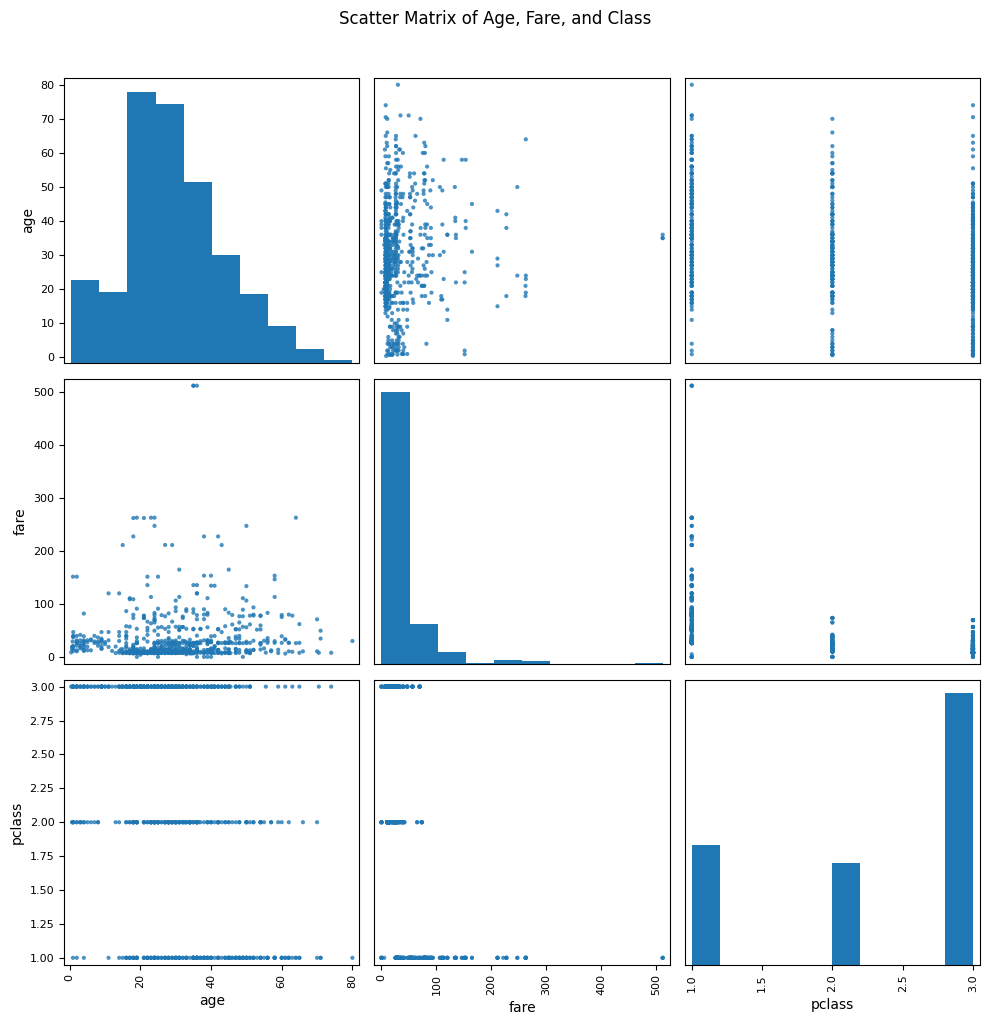

In [49]:
# 1. Scatter Matrix Plot
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10), alpha=0.8, diagonal='hist')
plt.suptitle('Scatter Matrix of Age, Fare, and Class', y=1.02)
plt.tight_layout()
plt.show()
plt.close()

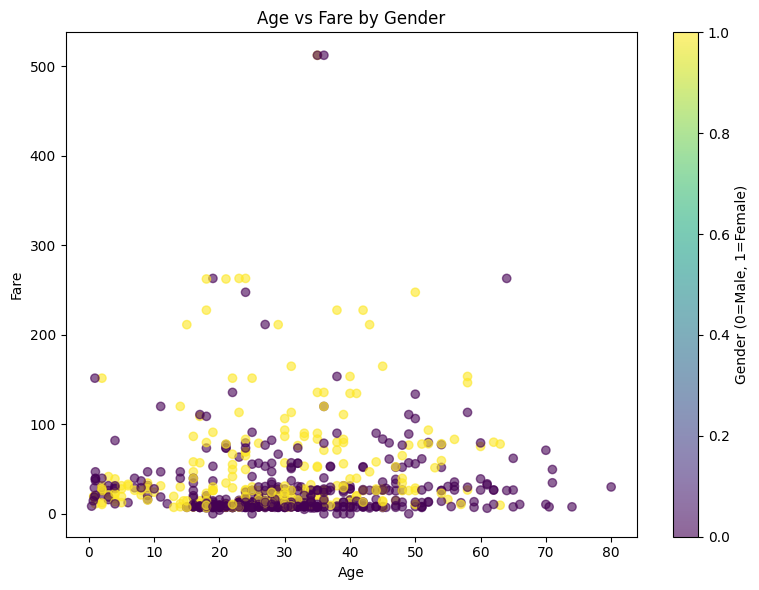

In [50]:
# 2. Age vs Fare by Gender Plot
plt.figure(figsize=(8, 6))
plt.scatter(titanic['age'], titanic['fare'],
           c=titanic['sex'].apply(lambda x: 0 if x == 'male' else 1),
           alpha=0.6)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.colorbar(label='Gender (0=Male, 1=Female)')
plt.tight_layout()
plt.show()
plt.close()

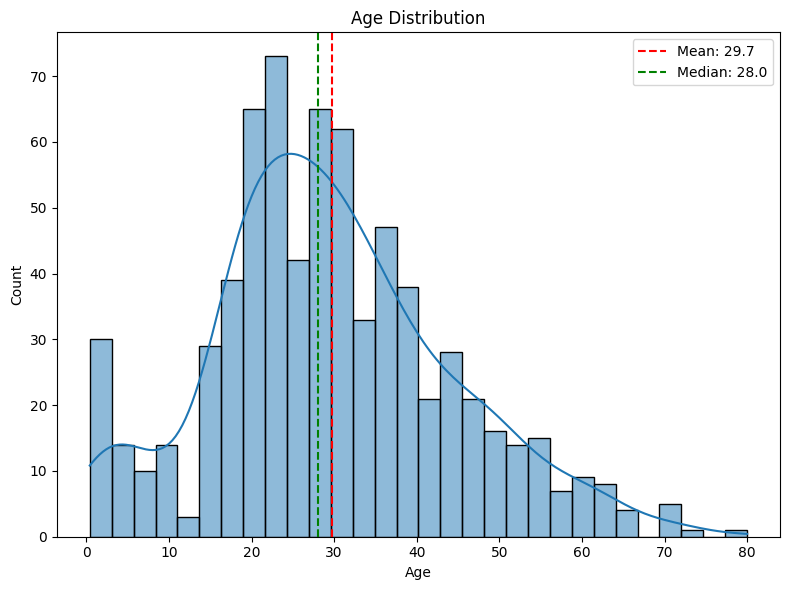

In [51]:
# 3. Age Distribution Plot
plt.figure(figsize=(8, 6))
ax = sns.histplot(data=titanic, x='age', kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

# Add mean and median lines
mean_age = titanic['age'].mean()
median_age = titanic['age'].median()
plt.axvline(mean_age, color='red', linestyle='--', label=f'Mean: {mean_age:.1f}')
plt.axvline(median_age, color='green', linestyle='--', label=f'Median: {median_age:.1f}')
plt.legend()

plt.tight_layout()
plt.show()
plt.close()

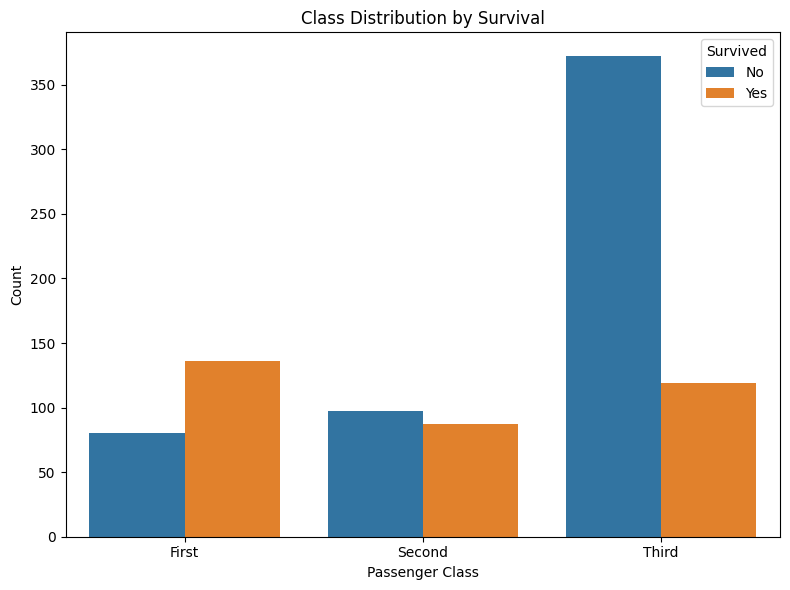

In [52]:
# 4. Class vs Survival Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=titanic, x='class', hue='survived')
plt.title('Class Distribution by Survival')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()
plt.close()